In [1]:
import pandas as pd
import numpy as np

from rubia_ann import *

# Classificação Binária

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None)
print(data.sample(10))
data[8].value_counts()

     0    1   2   3    4     5      6   7  8
426  0   94   0   0    0   0.0  0.256  25  0
188  8  109  76  39  114  27.9  0.640  31  1
577  2  118  80   0    0  42.9  0.693  21  1
122  2  107  74  30  100  33.6  0.404  23  0
204  6  103  72  32  190  37.7  0.324  55  0
376  0   98  82  15   84  25.2  0.299  22  0
728  2  175  88   0    0  22.9  0.326  22  0
165  6  104  74  18  156  29.9  0.722  41  1
588  3  176  86  27  156  33.3  1.154  52  1
341  1   95  74  21   73  25.9  0.673  36  0


0    500
1    268
Name: 8, dtype: int64

In [3]:
# balanceamento das classes via sampling
data = pd.concat([data.loc[data[8]==0].sample(268), data.loc[data[8]==1]], axis=0)
print(data.sample(10))
data[8].value_counts()

     0    1    2   3    4     5      6   7  8
205  5  111   72  28    0  23.9  0.407  27  0
219  5  112   66   0    0  37.8  0.261  41  1
735  4   95   60  32    0  35.4  0.284  28  0
279  2  108   62  10  278  25.3  0.881  22  0
605  1  124   60  32    0  35.8  0.514  21  0
662  8  167  106  46  231  37.6  0.165  43  1
523  9  130   70   0    0  34.2  0.652  45  1
365  5   99   54  28   83  34.0  0.499  30  0
536  0  105   90   0    0  29.6  0.197  46  0
110  3  171   72  33  135  33.3  0.199  24  1


1    268
0    268
Name: 8, dtype: int64

In [4]:
data = np.array(data)
X, y = data[:,:-1], data[:,-1]
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
X = scalarX.transform(X)
X

array([[0.05882353, 0.35678392, 0.39344262, ..., 0.30402385, 0.10231164,
        0.01960784],
       [0.11764706, 0.54773869, 0.75409836, ..., 0.63636364, 0.32577055,
        0.64705882],
       [0.47058824, 0.49748744, 0.68852459, ..., 0.52757079, 0.13013699,
        0.56862745],
       ...,
       [0.35294118, 0.95477387, 0.75409836, ..., 0.5290611 , 0.08304795,
        0.88235294],
       [0.52941176, 0.85427136, 0.60655738, ..., 0.6557377 , 0.13655822,
        0.43137255],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11344178,
        0.50980392]])

## Exemplo Minimalista
Todos os valores de parâmetros opcionais usando valores default


Available modes: regression, binary, multi, multioutput

Versions:
Keras : 2.2.4-tf
Tensorflow : 2.1.0
GPU disabled!
You have at least one available GPU device not in use!
Using -3 CPU workers

Available genes and variations:
epochs          [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
batch_size      [1, 2, 4, 8, 16, 32, 64, 128]
activators      ['sigmoid', 'softmax', 'elu', 'relu']
last_activation ['sigmoid', 'softmax']
losses          ['mean_squared_error', 'mean_absolute_error', 'binary_crossentropy', 'categorical_hinge', 'hinge', 'logcosh']
optimizers      ['sgd', 'adam', 'adagrad', 'rmsprop', 'adadelta']
denses          [0, 1, 2, 4, 8, 16, 32, 64]
dropout         [True, False]
dropout_rate    [0.1, 0.2, 0.3, 0.4]
Mutable:        ['epochs', 'batch_size', 'activators', 'last_activation', 'losses', 'optimizers', 'denses', 'dropout', 'dropout_rate']

Neural network and genetics set:
X data shape:             (536, 8)
y data shape:             (536,)
Max topology dep

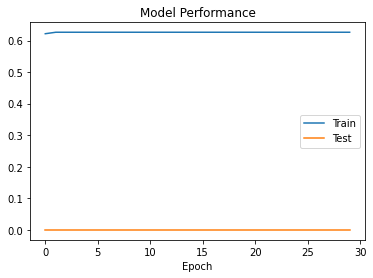

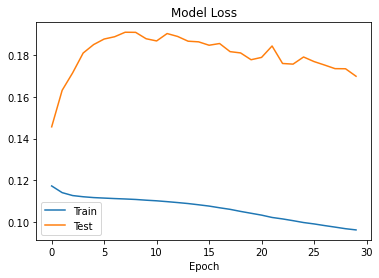

/home/lazarop/miniconda3/envs/tfgpu/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


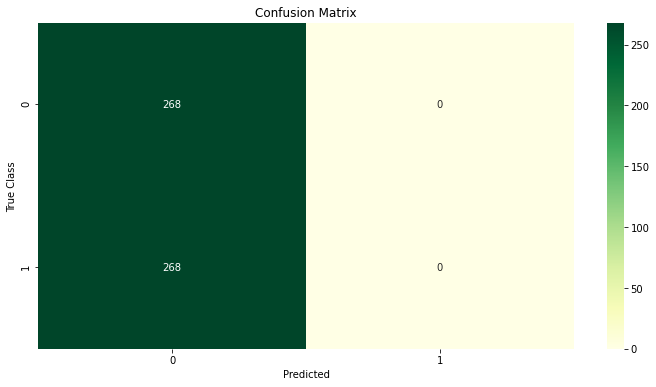

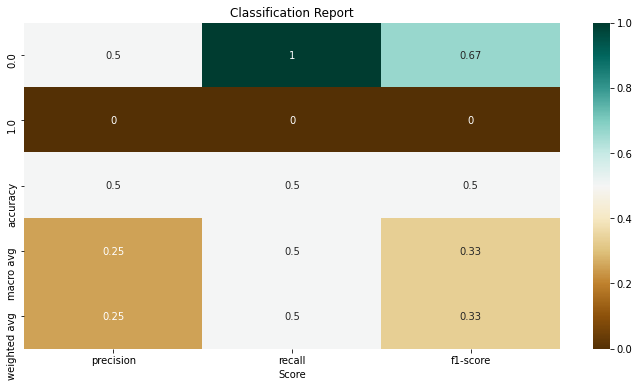

ACCURACY:  50.0 %


In [5]:
input_dim = 8
output_dim = 1
mode = 'binary'

k = simpler_keras(X=X, y=y, mode=mode)

k.check()

k.setGenetic(input_dim=input_dim, output_dim=output_dim)

k.runGenerations()

## Exemplo Robusto
Parâmetros personalizados


Available modes: regression, binary, multi, multioutput

Versions:
Keras : 2.2.4-tf
Tensorflow : 2.1.0
GPU disabled!
You have at least one available GPU device not in use!
Using 10 CPU workers

Available genes and variations:
optimizers      ['adam']
losses          ['binary_crossentropy']
activators      ['relu']
last_activation ['sigmoid', 'softmax']
denses          [4, 8, 16]
dropout         [False]
dropout_rate    [0.0]
epochs          [50, 100, 200]
batch_size      [10, 200, 800]
Mutable:        ['last_activation', 'denses', 'epochs', 'batch_size']

Neural network and genetics set:
X data shape:             (536, 8)
y data shape:             (536,)
Max topology dept:        ['Dense', 'Dense', 'Dense']
Population size:          100
Number of generations:    5
Proportion on strain:     0.2
DNA length:               17
Genes available to mutate:
 ['last_activation', 'denses', 'epochs', 'batch_size']

Neural network train starting...

Running generation: 1
Current Average Score: 0.59

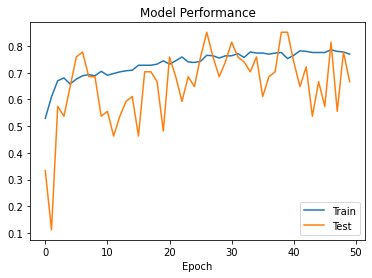

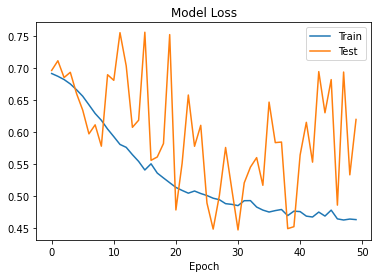

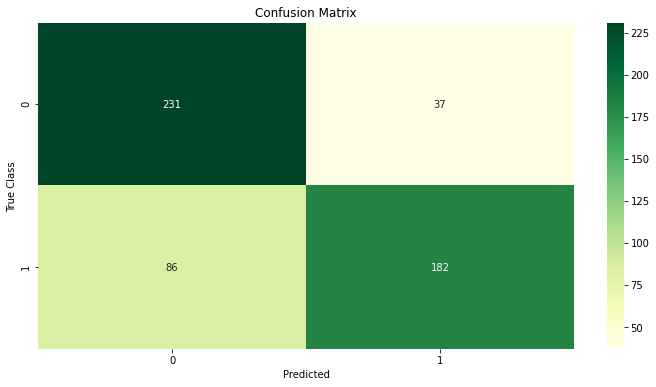

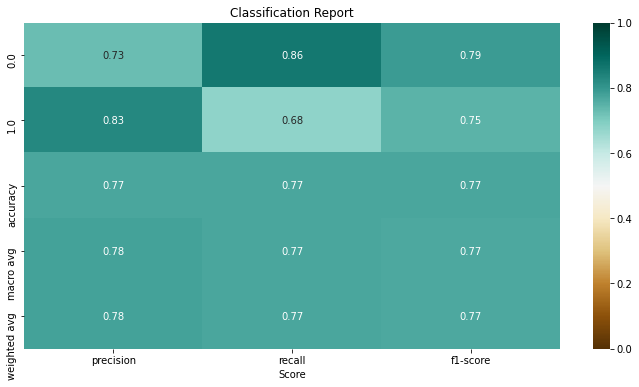

ACCURACY:  77.1 %
Total elapsed time (s): 2400.90


In [6]:
input_dim = 8
output_dim = 1
mode = 'binary'
topology = ['Dense','Dense','Dense']
metric = ['accuracy']

GENES = {
    'optimizers': ['adam'],
    'losses': ['binary_crossentropy'],
    'activators': ['relu'],
    'last_activation': ['sigmoid','softmax'],
    'denses': [2 ** i for i in range(2, 5)],
    'dropout': [False],
    'dropout_rate': [0.],
    'epochs': [50, 100, 200],
    'batch_size': [50, 200, 800]
}

# gpu and fixed_genes below are optional parameters 
start = time.time()

k = simpler_keras(X=X, y=y, mode=mode, gpu=False, workers=10, fixed_genes=GENES)

k.check()

k.setGenetic(topology=topology, population=100, generations=5, keep_portion=0.2, 
             input_dim=input_dim, output_dim=output_dim, metrics=metric)

k.runGenerations(cv=5, validation_split=0.1, n_mutations=3, crossover=0.4, 
                 performance_cap=0.2, verbose=0)

print('Total elapsed time (s): %.2f' % (time.time() - start))

# Regressor

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/advinstai/Aprendizagem-estatistica-regressao/master/exercicios/Advertising.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.sample(10)

,TV,radio,newspaper,sales
86,76.3,27.5,16.0,12.0
146,240.1,7.3,8.7,13.2
25,262.9,3.5,19.5,12.0
152,197.6,23.3,14.2,16.6
160,172.5,18.1,30.7,14.4
61,261.3,42.7,54.7,24.2
137,273.7,28.9,59.7,20.8
55,198.9,49.4,60.0,23.7
65,69.0,9.3,0.9,9.3
196,94.2,4.9,8.1,9.7


In [8]:
data = np.array(data)
X, y = data[:,:-1], data[:,-1]
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
X = scalarX.transform(X)
X[:10]

array([[0.77578627, 0.76209677, 0.60598065],
       [0.1481231 , 0.79233871, 0.39401935],
       [0.0557998 , 0.92540323, 0.60686016],
       [0.50997633, 0.83266129, 0.51187335],
       [0.60906324, 0.21774194, 0.51099384],
       [0.02705445, 0.9858871 , 0.65699208],
       [0.19208657, 0.66129032, 0.20404573],
       [0.4041258 , 0.39516129, 0.09938434],
       [0.02671627, 0.04233871, 0.00615655],
       [0.67331755, 0.05241935, 0.18381706]])

## Exemplo Minimalista
Todos os valores de parâmetros opcionais usando valores default

In [9]:
input_dim = 3
output_dim = 1
mode = 'regression'

k = simpler_keras(X=X, y=y, mode=mode)

k.check()

k.setGenetic(input_dim=input_dim, output_dim=output_dim)

k.runGenerations()


Available modes: regression, binary, multi, multioutput

Versions:
Keras : 2.2.4-tf
Tensorflow : 2.1.0
GPU disabled!
You have at least one available GPU device not in use!
Using -3 CPU workers

Available genes and variations:
epochs          [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
batch_size      [1, 2, 4, 8, 16, 32, 64, 128]
activators      ['sigmoid', 'softmax', 'elu', 'relu']
last_activation ['sigmoid', 'softmax']
losses          ['mean_squared_error', 'mean_absolute_error', 'binary_crossentropy', 'categorical_hinge', 'hinge', 'logcosh']
optimizers      ['sgd', 'adam', 'adagrad', 'rmsprop', 'adadelta']
denses          [0, 1, 2, 4, 8, 16, 32, 64]
dropout         [True, False]
dropout_rate    [0.1, 0.2, 0.3, 0.4]
Mutable:        ['epochs', 'batch_size', 'activators', 'last_activation', 'losses', 'optimizers', 'denses', 'dropout', 'dropout_rate']

Neural network and genetics set:
X data shape:             (200, 3)
y data shape:             (200,)
Max topology dep

NameError: name 'StatifiedKFold' is not defined

## Exemplo Robusto
Parâmetros personalizados

In [ ]:
input_dim = 3
output_dim = 1
mode = 'regression'

topology = ['Dense','Dense','Dense']
metric = ['mse']

GENES = {
    'optimizers': ['rmsprop','adam'],
    'losses': ['mse'],
    'activators': ['relu'],
    'last_activation': ['relu','linear'],
    'denses': [2 ** i for i in range(2, 5)],
    'dropout': [False],
    'dropout_rate': [0.0],
    'epochs': [30, 50, 100],
    'batch_size': [10, 200, 400, 800]
}

# gpu and fixed_genes below are optional parameters 
start = time.time()

k = simpler_keras(X=X, y=y, mode=mode, gpu=False, workers=10, fixed_genes=GENES)

k.check()

k.setGenetic(topology=topology, population=100, generations=5, keep_portion=0.2, 
             input_dim=input_dim, output_dim=output_dim, metrics=metric)

k.runGenerations(cv=5, validation_split=0.1, n_mutations=3, crossover=0.4, 
                 performance_cap=0.2, verbose=0)

print('Total elapsed time (s): %.2f' % (time.time() - start))